Tópico muito importante para os negócios, pois através disso é possível saber qual data comemorativa pode ter um melhor resultado nas vendas de uma empresa em que se trabalha ou realiza um capacite mais adequado para atender as demandas esporádicas. 


O prophet tem um suporte bem robusto para detectar as vendas perdidas no Feriado. Podemos calcular os impactos dos feriados, além de ajustá-los com o nosso conhecimento de negócio. 

Vamos aprender como aplicar feriados padrões de um país estado e criar feriados personalizados. Assim, como controlar os efeitos desses feriados com a regularização. 
. 

# Utilizaremos a biblioteca holidays

## Como trabalhar com Feriados

## Trabalhando com os Feriados Padrões de cada país. 

https://github.com/dr-prodigy/python-holidays#available-countries


Na biblioteca holiday tem feriados para cada país, e opcionamente para cada Estado ou província. Para isso, é necessário passar o nome do país utilizando o código ISO, podendo utilizar o site:https://github.com/dr-prodigy/python-holidays#available-countries.


Country:Brazil	

conde:BR	

Subdivisions: States: AC, AL, AM, AP, BA, CE, DF, ES, GO, MA, MG, MS, MT, PA, PB, PE, PI, PR, RJ, RN, RO, RR, RS, SC, SE, SP, TO

Supported Categories: 	OPTIONAL


In [1]:
import pandas as pd
df = pd.read_csv('../Modulo5/divvy_daily.csv')
display(df)
df = df[['date', 'rides']]
df['date'] = pd.to_datetime(df['date'])
df.columns =['ds', 'y']
display(df)


,date,rides,temperature,weather
0,1/1/2014,95,19.483158,rain or snow
1,1/2/2014,111,16.833333,rain or snow
2,1/3/2014,6,-5.633333,clear
3,1/4/2014,181,30.007735,rain or snow
4,1/5/2014,32,16.756250,rain or snow
...,...,...,...,...
1453,12/27/2017,1117,2.458013,cloudy
1454,12/28/2017,1267,10.802762,rain or snow
1455,12/29/2017,1049,12.978932,cloudy
1456,12/30/2017,519,3.657033,cloudy


,ds,y
0,2014-01-01,95
1,2014-01-02,111
2,2014-01-03,6
3,2014-01-04,181
4,2014-01-05,32
...,...,...
1453,2017-12-27,1117
1454,2017-12-28,1267
1455,2017-12-29,1049
1456,2017-12-30,519



# Primeiro, adicionando os feriados para os Estados Unidos, e , em seguida, incluindo alguns feriados adicionais para Illionis, já que a Divvy é em Chicago. 

In [2]:
from prophet import Prophet

model = Prophet(
    seasonality_mode='multiplicative',
    yearly_seasonality=4,
    weekly_seasonality=False)

/home/fabiene/anaconda3/envs/Udemy/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.


In [3]:

model.add_country_holidays(country_name='US')

In [4]:
model

In [5]:
model.fit(df)

21:12:39 - cmdstanpy - INFO - Chain [1] start processing
21:12:39 - cmdstanpy - INFO - Chain [1] done processing


In [6]:
future = model.make_future_dataframe(periods=365)
future

,ds
0,2014-01-01
1,2014-01-02
2,2014-01-03
3,2014-01-04
4,2014-01-05
...,...
1818,2018-12-27
1819,2018-12-28
1820,2018-12-29
1821,2018-12-30


In [7]:
forecast = model.predict(future)
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,Christmas Day,Christmas Day_lower,Christmas Day_upper,Christmas Day (observed),...,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yearly,yearly_lower,yearly_upper,additive_terms,additive_terms_lower,additive_terms_upper,yhat
0,2014-01-01,3657.991125,-1801.675622,3257.133711,3657.991125,3657.991125,0.0,0.0,0.0,0.0,...,-0.815981,-0.815981,-0.815981,-0.643644,-0.643644,-0.643644,0.0,0.0,0.0,673.139649
1,2014-01-02,3662.623751,-1161.141302,3758.161519,3662.623751,3662.623751,0.0,0.0,0.0,0.0,...,-0.645168,-0.645168,-0.645168,-0.645168,-0.645168,-0.645168,0.0,0.0,0.0,1299.616182
2,2014-01-03,3667.256377,-1106.495273,3795.744959,3667.256377,3667.256377,0.0,0.0,0.0,0.0,...,-0.646349,-0.646349,-0.646349,-0.646349,-0.646349,-0.646349,0.0,0.0,0.0,1296.927221
3,2014-01-04,3671.889003,-1216.505391,3633.174671,3671.889003,3671.889003,0.0,0.0,0.0,0.0,...,-0.647195,-0.647195,-0.647195,-0.647195,-0.647195,-0.647195,0.0,0.0,0.0,1295.459186
4,2014-01-05,3676.521629,-1299.604294,3897.464865,3676.521629,3676.521629,0.0,0.0,0.0,0.0,...,-0.647713,-0.647713,-0.647713,-0.647713,-0.647713,-0.647713,0.0,0.0,0.0,1295.189293
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1818,2018-12-27,9050.885015,931.118890,6031.858787,8948.239523,9144.739359,0.0,0.0,0.0,0.0,...,-0.629794,-0.629794,-0.629794,-0.629794,-0.629794,-0.629794,0.0,0.0,0.0,3350.694837
1819,2018-12-28,9052.755013,781.398396,6031.515093,8949.642306,9146.975915,0.0,0.0,0.0,0.0,...,-0.633208,-0.633208,-0.633208,-0.633208,-0.633208,-0.633208,0.0,0.0,0.0,3320.478664
1820,2018-12-29,9054.625011,806.182592,5727.595793,8951.203166,9149.058261,0.0,0.0,0.0,0.0,...,-0.636252,-0.636252,-0.636252,-0.636252,-0.636252,-0.636252,0.0,0.0,0.0,3293.599077
1821,2018-12-30,9056.495009,674.310373,5870.650265,8952.803239,9151.619123,0.0,0.0,0.0,0.0,...,-0.638931,-0.638931,-0.638931,-0.638931,-0.638931,-0.638931,0.0,0.0,0.0,3270.022022


/home/fabiene/anaconda3/envs/Udemy/lib/python3.11/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/home/fabiene/anaconda3/envs/Udemy/lib/python3.11/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


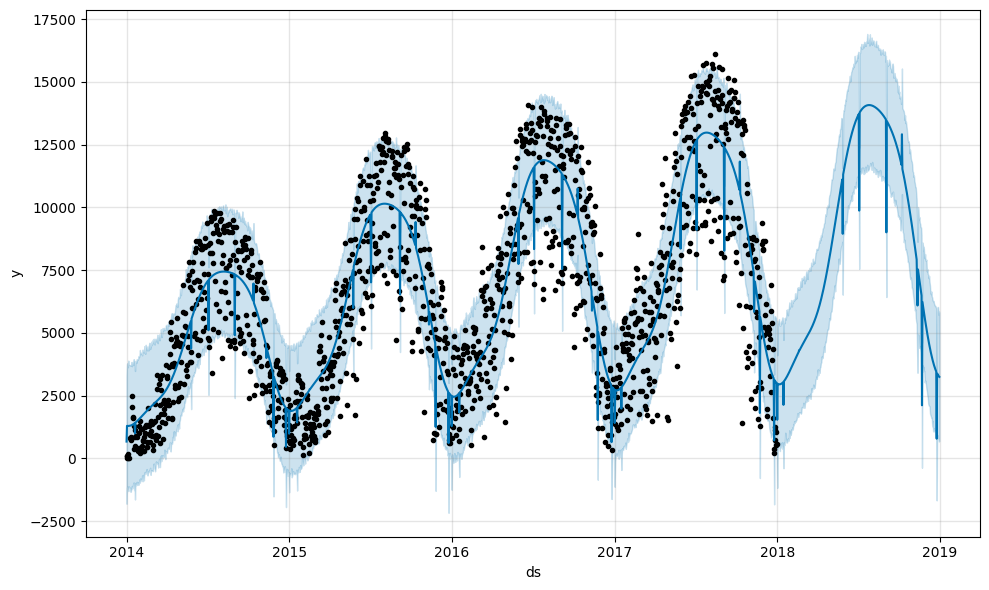

In [8]:

import matplotlib.pyplot as plt

fig = model.plot(forecast)
plt.show()


# vamos plotar o componente.





O resultado é muito semelhante ao anterior, de outras aulas, mas se você reparar, nós vamos ter alguns picos, por conta do efeito dos feriados que foi adicionado na análise. 

/home/fabiene/anaconda3/envs/Udemy/lib/python3.11/site-packages/prophet/plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/home/fabiene/anaconda3/envs/Udemy/lib/python3.11/site-packages/prophet/plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
/home/fabiene/anaconda3/envs/Udemy/lib/python3.11/site-packages/prophet/plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime obje

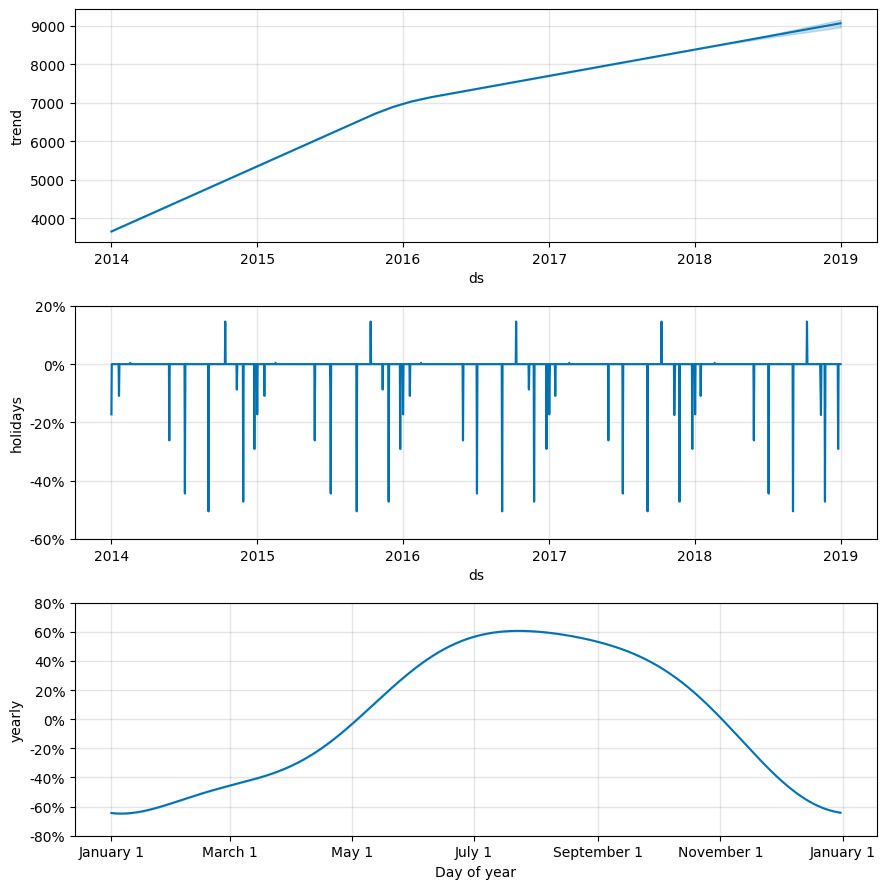

In [9]:
e = model.plot_components(forecast)
plt.show()

Na compontente há a plotagem do impacto dos feriados no modelo. Analisando o gráfico, vemos que os feriados representam uma queda na utilização das bikes, exceto por um feriado específico, que representa o aumento que é indicado nas retas positivas. Vamos descobrir qual é esse feriado.

## Nós conseguimos ver os feriados que estão incluídos no modelo através do comando Model Train Holiday names.  

In [10]:
model.train_holiday_names

0                  New Year's Day
1                    Memorial Day
2                Independence Day
3                       Labor Day
4                    Veterans Day
5                    Thanksgiving
6                   Christmas Day
7        Christmas Day (observed)
8      Martin Luther King Jr. Day
9           Washington's Birthday
10                   Columbus Day
11      New Year's Day (observed)
12        Veterans Day (observed)
13    Independence Day (observed)
dtype: object

# podemos pesquisar por aqui:



In [11]:
display(forecast)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,Christmas Day,Christmas Day_lower,Christmas Day_upper,Christmas Day (observed),...,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yearly,yearly_lower,yearly_upper,additive_terms,additive_terms_lower,additive_terms_upper,yhat
0,2014-01-01,3657.991125,-1801.675622,3257.133711,3657.991125,3657.991125,0.0,0.0,0.0,0.0,...,-0.815981,-0.815981,-0.815981,-0.643644,-0.643644,-0.643644,0.0,0.0,0.0,673.139649
1,2014-01-02,3662.623751,-1161.141302,3758.161519,3662.623751,3662.623751,0.0,0.0,0.0,0.0,...,-0.645168,-0.645168,-0.645168,-0.645168,-0.645168,-0.645168,0.0,0.0,0.0,1299.616182
2,2014-01-03,3667.256377,-1106.495273,3795.744959,3667.256377,3667.256377,0.0,0.0,0.0,0.0,...,-0.646349,-0.646349,-0.646349,-0.646349,-0.646349,-0.646349,0.0,0.0,0.0,1296.927221
3,2014-01-04,3671.889003,-1216.505391,3633.174671,3671.889003,3671.889003,0.0,0.0,0.0,0.0,...,-0.647195,-0.647195,-0.647195,-0.647195,-0.647195,-0.647195,0.0,0.0,0.0,1295.459186
4,2014-01-05,3676.521629,-1299.604294,3897.464865,3676.521629,3676.521629,0.0,0.0,0.0,0.0,...,-0.647713,-0.647713,-0.647713,-0.647713,-0.647713,-0.647713,0.0,0.0,0.0,1295.189293
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1818,2018-12-27,9050.885015,931.118890,6031.858787,8948.239523,9144.739359,0.0,0.0,0.0,0.0,...,-0.629794,-0.629794,-0.629794,-0.629794,-0.629794,-0.629794,0.0,0.0,0.0,3350.694837
1819,2018-12-28,9052.755013,781.398396,6031.515093,8949.642306,9146.975915,0.0,0.0,0.0,0.0,...,-0.633208,-0.633208,-0.633208,-0.633208,-0.633208,-0.633208,0.0,0.0,0.0,3320.478664
1820,2018-12-29,9054.625011,806.182592,5727.595793,8951.203166,9149.058261,0.0,0.0,0.0,0.0,...,-0.636252,-0.636252,-0.636252,-0.636252,-0.636252,-0.636252,0.0,0.0,0.0,3293.599077
1821,2018-12-30,9056.495009,674.310373,5870.650265,8952.803239,9151.619123,0.0,0.0,0.0,0.0,...,-0.638931,-0.638931,-0.638931,-0.638931,-0.638931,-0.638931,0.0,0.0,0.0,3270.022022


## Nas respostas extras, para o intervalo de confiança, de cada um. Conseguimos ver como cada feriado está impactando o nosso modelo. 

Para extrair essa influência dos feriados, nós vamos precisar executar um código  

In [12]:
forecast[forecast['Columbus Day'] != 0]['Columbus Day']

283     0.146089
646     0.146089
1010    0.146089
1374    0.146089
1738    0.146089
Name: Columbus Day, dtype: float64

In [13]:
def first_non_zero(fcst, holiday):
  return fcst[fcst[holiday] != 0][holiday].values[0]

In [14]:
pd.DataFrame({'holiday': model.train_holiday_names})

,holiday
0,New Year's Day
1,Memorial Day
2,Independence Day
3,Labor Day
4,Veterans Day
5,Thanksgiving
6,Christmas Day
7,Christmas Day (observed)
8,Martin Luther King Jr. Day
9,Washington's Birthday


effect = efeito ou o impacto do feriado 

In [15]:

pd.DataFrame({'holiday': model.train_holiday_names,
              'effect': [first_non_zero(forecast, holiday)
                        for holiday in\
                        model.train_holiday_names]})

,holiday,effect
0,New Year's Day,-0.172337
1,Memorial Day,-0.261629
2,Independence Day,-0.444171
3,Labor Day,-0.505271
4,Veterans Day,-0.087192
5,Thanksgiving,-0.471984
6,Christmas Day,-0.291176
7,Christmas Day (observed),-0.076260
8,Martin Luther King Jr. Day,-0.109137
9,Washington's Birthday,0.004428


In [16]:
Efeito_feriado= pd.DataFrame({'holiday': model.train_holiday_names,
              'effect': [first_non_zero(forecast, holiday)
                        for holiday in\
                        model.train_holiday_names]})

os desvios dos feriados são calculados de forma percentual

A sazonalidade model também afeta os feriados

In [17]:
Efeito_feriado.sort_values(by='effect', ascending=False)

,holiday,effect
10,Columbus Day,0.146089
9,Washington's Birthday,0.004428
11,New Year's Day (observed),-0.051304
7,Christmas Day (observed),-0.076260
4,Veterans Day,-0.087192
13,Independence Day (observed),-0.097338
8,Martin Luther King Jr. Day,-0.109137
0,New Year's Day,-0.172337
12,Veterans Day (observed),-0.174821
1,Memorial Day,-0.261629


In [18]:

print('efeito do feriado positivo')
Efeito_feriado.sort_values(by='effect', ascending=False).head(1)

efeito do feriado positivo


,holiday,effect
10,Columbus Day,0.146089


Isso é para entener o impcato dos feriados de determinada métrica de sua empresa.


Nas pŕoximas aulas, vamos entender coo aplicar os feraidos da província e estado. 

In [19]:
import holidays

# Definindo os feriados dos Estados Unidos, outro método, com relação ao dado acima
us_holidays = holidays.UnitedStates(years=2018)  # Substitua por outro ano se necessário

# Mostrando todos os feriados com datas
for date, name in sorted(us_holidays.items()):
    print(f'{date}: {name}')

2018-01-01: New Year's Day
2018-01-15: Martin Luther King Jr. Day
2018-02-19: Washington's Birthday
2018-05-28: Memorial Day
2018-07-04: Independence Day
2018-09-03: Labor Day
2018-10-08: Columbus Day
2018-11-11: Veterans Day
2018-11-12: Veterans Day (observed)
2018-11-22: Thanksgiving
2018-12-25: Christmas Day


In [20]:
print(us_holidays)

{datetime.date(2018, 1, 1): "New Year's Day", datetime.date(2018, 5, 28): 'Memorial Day', datetime.date(2018, 7, 4): 'Independence Day', datetime.date(2018, 9, 3): 'Labor Day', datetime.date(2018, 11, 11): 'Veterans Day', datetime.date(2018, 11, 12): 'Veterans Day (observed)', datetime.date(2018, 11, 22): 'Thanksgiving', datetime.date(2018, 12, 25): 'Christmas Day', datetime.date(2018, 1, 15): 'Martin Luther King Jr. Day', datetime.date(2018, 2, 19): "Washington's Birthday", datetime.date(2018, 10, 8): 'Columbus Day'}


# Adicionando Feriados Padrões de Provincia e Estado

In [21]:

from prophet.make_holidays import make_holidays_df

In [22]:
# pegamos apenas a lista dos anos na base que existem na base
year_list = df['ds'].dt.year.unique().tolist()



In [23]:
year_list

[2014, 2015, 2016, 2017]

In [24]:
# Adicionar o ano adicional que a gente vai prever. 
year_list.append(year_list[-1]+1)

year_list

[2014, 2015, 2016, 2017, 2018]

In [25]:
# Aqui efetivamente criamos os feriados do dataframe
# analisamos o país. o estado 
holidays = make_holidays_df(year_list = year_list, 
                            country ='US', 
                            state ='IL')


In [26]:
holidays

,ds,holiday
0,2016-01-01,New Year's Day
1,2016-05-30,Memorial Day
2,2016-07-04,Independence Day
3,2016-09-05,Labor Day
4,2016-11-11,Veterans Day
5,2016-11-24,Thanksgiving
6,2016-12-25,Christmas Day
7,2016-12-26,Christmas Day (observed)
8,2016-01-18,Martin Luther King Jr. Day
9,2016-02-15,Washington's Birthday


# passar os feriados como parâmetros para simular a previsão, 

In [27]:
df

,ds,y
0,2014-01-01,95
1,2014-01-02,111
2,2014-01-03,6
3,2014-01-04,181
4,2014-01-05,32
...,...,...
1453,2017-12-27,1117
1454,2017-12-28,1267
1455,2017-12-29,1049
1456,2017-12-30,519


In [28]:
model = Prophet(seasonality_mode ='multiplicative',
                yearly_seasonality =4, 
                holidays = holidays)
                
model.fit(df) 
               


21:12:40 - cmdstanpy - INFO - Chain [1] start processing
21:12:40 - cmdstanpy - INFO - Chain [1] done processing


In [29]:
future = model.make_future_dataframe(periods=365)
future

,ds
0,2014-01-01
1,2014-01-02
2,2014-01-03
3,2014-01-04
4,2014-01-05
...,...
1818,2018-12-27
1819,2018-12-28
1820,2018-12-29
1821,2018-12-30


In [30]:
forecast = model.predict(future)
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,Christmas Day,Christmas Day_lower,Christmas Day_upper,Christmas Day (observed),...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,additive_terms,additive_terms_lower,additive_terms_upper,yhat
0,2014-01-01,3522.471225,-568.730066,3085.705575,3522.471225,3522.471225,0.0,0.0,0.0,0.0,...,0.121840,0.121840,0.121840,-0.636201,-0.636201,-0.636201,0.0,0.0,0.0,1176.470439
1,2014-01-02,3527.809132,-118.215483,3528.215180,3527.809132,3527.809132,0.0,0.0,0.0,0.0,...,0.132368,0.132368,0.132368,-0.637714,-0.637714,-0.637714,0.0,0.0,0.0,1745.044924
2,2014-01-03,3533.147038,-223.523286,3500.515696,3533.147038,3533.147038,0.0,0.0,0.0,0.0,...,0.073357,0.073357,0.073357,-0.638889,-0.638889,-0.638889,0.0,0.0,0.0,1535.037628
3,2014-01-04,3538.484945,-1588.876569,2093.304467,3538.484945,3538.484945,0.0,0.0,0.0,0.0,...,-0.289072,-0.289072,-0.289072,-0.639734,-0.639734,-0.639734,0.0,0.0,0.0,251.919021
4,2014-01-05,3543.822852,-1765.015056,1870.300214,3543.822852,3543.822852,0.0,0.0,0.0,0.0,...,-0.329029,-0.329029,-0.329029,-0.640255,-0.640255,-0.640255,0.0,0.0,0.0,108.851063
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1818,2018-12-27,9137.476521,2731.515802,6503.698980,9012.568186,9272.511103,0.0,0.0,0.0,0.0,...,0.132368,0.132368,0.132368,-0.622500,-0.622500,-0.622500,0.0,0.0,0.0,4658.906937
1819,2018-12-28,9139.426676,2232.199620,5867.256655,9014.265307,9274.951841,0.0,0.0,0.0,0.0,...,0.073357,0.073357,0.073357,-0.625874,-0.625874,-0.625874,0.0,0.0,0.0,4089.738083
1820,2018-12-29,9141.376831,-1158.807264,2580.842314,9015.716844,9277.492626,0.0,0.0,0.0,0.0,...,-0.289072,-0.289072,-0.289072,-0.628883,-0.628883,-0.628883,0.0,0.0,0.0,749.998458
1821,2018-12-30,9143.326986,-1556.010749,2162.980798,9017.023014,9280.149010,0.0,0.0,0.0,0.0,...,-0.329029,-0.329029,-0.329029,-0.631533,-0.631533,-0.631533,0.0,0.0,0.0,360.591894


# Criando Feriados Personalizados 



### Bastante plausíveis adicionar a Black Friday e a véspera de Natal

Eles têm um comportamento que naturalmente desvia do comportamento padrão. Estando sob influência da data comemorativa. 

In [31]:
year_list

[2014, 2015, 2016, 2017, 2018]

In [32]:

# Criar data de feriado padrão
#lista de anos e o país
holidays = make_holidays_df(year_list = year_list, country ='US')

holidays

,ds,holiday
0,2016-01-01,New Year's Day
1,2016-05-30,Memorial Day
2,2016-07-04,Independence Day
3,2016-09-05,Labor Day
4,2016-11-11,Veterans Day
5,2016-11-24,Thanksgiving
6,2016-12-25,Christmas Day
7,2016-12-26,Christmas Day (observed)
8,2016-01-18,Martin Luther King Jr. Day
9,2016-02-15,Washington's Birthday



# Feriados com os feriados personalizados. 
 Criar um dataframe com a coluna e o nome do feriado e as datas referentes à ele.


Precisamos adicionar uma data para cada ano da nossa série temporal.

In [33]:
black_friday = pd.DataFrame({'holiday': 'Black Friday',
'ds': pd.to_datetime(
['2014-11-28',
'2015-11-27',
'2016-11-25',
'2017-11-24',
'2018-11-23'])})

black_friday


,holiday,ds
0,Black Friday,2014-11-28
1,Black Friday,2015-11-27
2,Black Friday,2016-11-25
3,Black Friday,2017-11-24
4,Black Friday,2018-11-23


In [34]:
christmas_eve = pd.DataFrame({'holiday': 'Christmas Eve',
'ds': pd.to_datetime(
['2014-12-24',
'2015-12-24',
'2016-12-24',
'2017-12-24',
'2018-12-24'])})

christmas_eve

,holiday,ds
0,Christmas Eve,2014-12-24
1,Christmas Eve,2015-12-24
2,Christmas Eve,2016-12-24
3,Christmas Eve,2017-12-24
4,Christmas Eve,2018-12-24


Lista completa dos dataframes

In [35]:
holidays = pd.concat([holidays, black_friday,christmas_eve]).sort_values('ds').reset_index(drop=True)
#ordenar para ficar mais claro na visualização

In [36]:
holidays

,ds,holiday
0,2014-01-01,New Year's Day
1,2014-01-20,Martin Luther King Jr. Day
2,2014-02-17,Washington's Birthday
3,2014-05-26,Memorial Day
4,2014-07-04,Independence Day
...,...,...
60,2018-11-12,Veterans Day (observed)
61,2018-11-22,Thanksgiving
62,2018-11-23,Black Friday
63,2018-12-24,Christmas Eve


In [37]:
holidays.head()

,ds,holiday
0,2014-01-01,New Year's Day
1,2014-01-20,Martin Luther King Jr. Day
2,2014-02-17,Washington's Birthday
3,2014-05-26,Memorial Day
4,2014-07-04,Independence Day


In [38]:
model = Prophet(
    seasonality_mode='multiplicative',
    yearly_seasonality=4,
    holidays=holidays)


In [39]:
model

In [40]:
model.fit(df)


21:12:40 - cmdstanpy - INFO - Chain [1] start processing
21:12:41 - cmdstanpy - INFO - Chain [1] done processing


In [41]:
future = model.make_future_dataframe(periods=365)
forecast = model.predict(future)
display(forecast)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,Black Friday,Black Friday_lower,Black Friday_upper,Christmas Day,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,additive_terms,additive_terms_lower,additive_terms_upper,yhat
0,2014-01-01,3589.474710,-584.735956,3021.360674,3589.474710,3589.474710,0.0,0.0,0.0,0.0,...,0.119500,0.119500,0.119500,-0.631941,-0.631941,-0.631941,0.0,0.0,0.0,1146.990344
1,2014-01-02,3594.514418,-176.477357,3532.336738,3594.514418,3594.514418,0.0,0.0,0.0,0.0,...,0.130383,0.130383,0.130383,-0.633850,-0.633850,-0.633850,0.0,0.0,0.0,1784.797163
2,2014-01-03,3599.554127,-255.107785,3419.025205,3599.554127,3599.554127,0.0,0.0,0.0,0.0,...,0.082967,0.082967,0.082967,-0.635416,-0.635416,-0.635416,0.0,0.0,0.0,1610.984871
3,2014-01-04,3604.593835,-1441.991495,2093.001249,3604.593835,3604.593835,0.0,0.0,0.0,0.0,...,-0.290117,-0.290117,-0.290117,-0.636646,-0.636646,-0.636646,0.0,0.0,0.0,263.990247
4,2014-01-05,3609.633543,-1760.444142,2021.188289,3609.633543,3609.633543,0.0,0.0,0.0,0.0,...,-0.329741,-0.329741,-0.329741,-0.637545,-0.637545,-0.637545,0.0,0.0,0.0,118.085155
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1818,2018-12-27,9126.501649,2944.387191,6506.781193,8966.000437,9284.551870,0.0,0.0,0.0,0.0,...,0.130383,0.130383,0.130383,-0.616129,-0.616129,-0.616129,0.0,0.0,0.0,4693.337085
1819,2018-12-28,9128.410061,2477.145287,6041.631982,8967.140328,9286.659091,0.0,0.0,0.0,0.0,...,0.082967,0.082967,0.082967,-0.619905,-0.619905,-0.619905,0.0,0.0,0.0,4227.020697
1820,2018-12-29,9130.318473,-980.341120,2584.131987,8968.366206,9288.766313,0.0,0.0,0.0,0.0,...,-0.290117,-0.290117,-0.290117,-0.623318,-0.623318,-0.623318,0.0,0.0,0.0,790.366364
1821,2018-12-30,9132.226885,-1491.737574,2177.511371,8969.592084,9291.379880,0.0,0.0,0.0,0.0,...,-0.329741,-0.329741,-0.329741,-0.626371,-0.626371,-0.626371,0.0,0.0,0.0,400.800622



# Criando Feriados com Multiplos dias 

In [42]:



holidays = make_holidays_df(year_list = year_list, country ='US')

In [43]:
holidays

,ds,holiday
0,2016-01-01,New Year's Day
1,2016-05-30,Memorial Day
2,2016-07-04,Independence Day
3,2016-09-05,Labor Day
4,2016-11-11,Veterans Day
5,2016-11-24,Thanksgiving
6,2016-12-25,Christmas Day
7,2016-12-26,Christmas Day (observed)
8,2016-01-18,Martin Luther King Jr. Day
9,2016-02-15,Washington's Birthday




#### Holiday dataframe que construímos para preehcer os nossos feriados nos exemplos anteriores, com colunas opcionais lower e upper. 



Essas colunas especificam dias adicionais antes ou depois do feriado principal que o prophet faça a previsão.

Antes tinhamos colocado a véspera do natal como feriado, outro método era modelar apenas o Natal, incluir um lower indo de 1, dizendo para o prophet para incluir um dia antes do Natal como parte do feriado. Isso perssupôe que a data da véspera do Natal sempre caia antes do Natal. Mas, se no entanto, a véspera do Natal fosse um feriado flutuante que nem sempre cai imediatamente um dia antes do Natal, esse método de janelas não seria possível utilizar. 

Para demonstrar essa funcionalidade, nós vamos dar um exemplo. 

Todo mês de julho em Chicago tem um festival de 5 dias, chamado Taste of Chicago. Esse é o maior festival gastronômico do mundo, onde várias pessoas vão para Chicago apenas para conhecer esse festival. Com tantas pessoas circulando pela cidade seria surpreendente se isso não tivesse nenhum efeito na utilização dos serviços da 'divvy'

#### Neste exemplo, nós vamos modelar esse festival Taste of Chicago como feriado de 5 dias. 


Veremos o efeito disso que tem na nossa previsão. 



### Agora nós estamos criando um datafame com os dias que acontecem com o festival a cada an e adicinando o upper window como 4, o que inclui 4 dias após o primeiro dia do evento, totalizando 5 dias. 

In [44]:
taste_of_chicago = pd.DataFrame(
    {
        "holiday": "Taste of Chicago",
        "ds": pd.to_datetime(
            ["2014-07-09",
             "2015-07-08",
             "2016-07-06",
             "2017-07-05",
             "2018-07-11"]
        ),
        "lower_window": 0,
        "upper_window": 4,
    }
)

In [45]:
taste_of_chicago

,holiday,ds,lower_window,upper_window
0,Taste of Chicago,2014-07-09,0,4
1,Taste of Chicago,2015-07-08,0,4
2,Taste of Chicago,2016-07-06,0,4
3,Taste of Chicago,2017-07-05,0,4
4,Taste of Chicago,2018-07-11,0,4


Em seguida concatenaos os dois dataframes 

In [46]:
holidays = (
    pd.concat([holidays, taste_of_chicago]).sort_values("ds").reset_index(drop=True)
)


In [47]:
holidays

,ds,holiday,lower_window,upper_window
0,2014-01-01,New Year's Day,NaN,NaN
1,2014-01-20,Martin Luther King Jr. Day,NaN,NaN
2,2014-02-17,Washington's Birthday,NaN,NaN
3,2014-05-26,Memorial Day,NaN,NaN
4,2014-07-04,Independence Day,NaN,NaN
5,2014-07-09,Taste of Chicago,0.0,4.0
6,2014-09-01,Labor Day,NaN,NaN
7,2014-10-13,Columbus Day,NaN,NaN
8,2014-11-11,Veterans Day,NaN,NaN
9,2014-11-27,Thanksgiving,NaN,NaN



### No holidays tem duas colunas novas lower_window e upper_window, notamos que o número no dataframe signiica que a nossa window não terá efeito nenhum para aquele feriado. 


Agora prosseguimos para a instanciação do modelo efetivamente, assim como nós fizemos nos exemplos anteriores. 

In [48]:

model = Prophet(
    seasonality_mode="multiplicative", yearly_seasonality=4, holidays=holidays
)
model.fit(df)
future = model.make_future_dataframe(periods=365)
forecast = model.predict(future)

21:12:41 - cmdstanpy - INFO - Chain [1] start processing
21:12:41 - cmdstanpy - INFO - Chain [1] done processing


In [49]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,Christmas Day,Christmas Day_lower,Christmas Day_upper,Christmas Day (observed),...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,additive_terms,additive_terms_lower,additive_terms_upper,yhat
0,2014-01-01,3564.253845,-825.495592,3145.926585,3564.253845,3564.253845,0.0,0.0,0.0,0.0,...,0.122670,0.122670,0.122670,-0.636144,-0.636144,-0.636144,0.0,0.0,0.0,1186.312939
1,2014-01-02,3569.351385,-105.659484,3526.295140,3569.351385,3569.351385,0.0,0.0,0.0,0.0,...,0.132023,0.132023,0.132023,-0.637644,-0.637644,-0.637644,0.0,0.0,0.0,1764.614495
2,2014-01-03,3574.448925,-274.390660,3450.146023,3574.448925,3574.448925,0.0,0.0,0.0,0.0,...,0.072544,0.072544,0.072544,-0.638806,-0.638806,-0.638806,0.0,0.0,0.0,1550.372050
3,2014-01-04,3579.546465,-1652.761874,2078.952426,3579.546465,3579.546465,0.0,0.0,0.0,0.0,...,-0.289189,-0.289189,-0.289189,-0.639639,-0.639639,-0.639639,0.0,0.0,0.0,254.763960
4,2014-01-05,3584.644005,-1767.847211,1987.887600,3584.644005,3584.644005,0.0,0.0,0.0,0.0,...,-0.329272,-0.329272,-0.329272,-0.640148,-0.640148,-0.640148,0.0,0.0,0.0,109.615642
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1818,2018-12-27,9110.227676,2814.606209,6349.141858,8979.491733,9257.351588,0.0,0.0,0.0,0.0,...,0.132023,0.132023,0.132023,-0.622514,-0.622514,-0.622514,0.0,0.0,0.0,4641.745002
1819,2018-12-28,9112.137170,2328.727507,5989.343330,8980.678539,9259.963587,0.0,0.0,0.0,0.0,...,0.072544,0.072544,0.072544,-0.625874,-0.625874,-0.625874,0.0,0.0,0.0,4070.119927
1820,2018-12-29,9114.046664,-1052.867787,2606.154130,8981.974913,9262.371809,0.0,0.0,0.0,0.0,...,-0.289189,-0.289189,-0.289189,-0.628869,-0.628869,-0.628869,0.0,0.0,0.0,746.820092
1821,2018-12-30,9115.956158,-1575.614389,2150.826997,8983.853780,9264.523685,0.0,0.0,0.0,0.0,...,-0.329272,-0.329272,-0.329272,-0.631505,-0.631505,-0.631505,0.0,0.0,0.0,357.549942



# Entender o impacto dos dias do evento no nosso modelo de previsão. 

# Vamos analisar os 5 dias 

In [50]:
print(forecast[forecast['ds'].isin(['2018-07-11',
'2018-07-12',
'2018-07-13',
'2018-07-14',
'2018-07-15']
)][['ds',
'Taste of Chicago']])


             ds  Taste of Chicago
1649 2018-07-11         -0.036604
1650 2018-07-12          0.018863
1651 2018-07-13          0.068313
1652 2018-07-14          0.014960
1653 2018-07-15          0.021785


/tmp/ipykernel_6496/2267053197.py:1: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  print(forecast[forecast['ds'].isin(['2018-07-11',


In [51]:
forecast[forecast['ds'].isin(['2018-07-11','2018-07-12','2018-07-13','2018-07-14','2018-07-15'])]


/tmp/ipykernel_6496/1202462893.py:1: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  forecast[forecast['ds'].isin(['2018-07-11','2018-07-12','2018-07-13','2018-07-14','2018-07-15'])]


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,Christmas Day,Christmas Day_lower,Christmas Day_upper,Christmas Day (observed),...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,additive_terms,additive_terms_lower,additive_terms_upper,yhat
1649,2018-07-11,8787.523207,12800.796924,16485.729708,8738.614820,8842.217996,0.0,0.0,0.0,0.0,...,0.122670,0.122670,0.122670,0.588738,0.588738,0.588738,0.0,0.0,0.0,14717.379813
1650,2018-07-12,8789.432701,13465.026918,17125.913231,8740.118034,8844.278529,0.0,0.0,0.0,0.0,...,0.132023,0.132023,0.132023,0.590491,0.590491,0.590491,0.0,0.0,0.0,15305.721040
1651,2018-07-13,8791.342195,13311.698815,16968.040693,8741.671079,8846.658470,0.0,0.0,0.0,0.0,...,0.072544,0.072544,0.072544,0.592074,0.592074,0.592074,0.0,0.0,0.0,15234.780163
1652,2018-07-14,8793.251689,9721.901379,13419.993503,8743.226654,8849.270116,0.0,0.0,0.0,0.0,...,-0.289189,-0.289189,-0.289189,0.593490,0.593490,0.593490,0.0,0.0,0.0,11600.599660
1653,2018-07-15,8795.161183,9502.233683,13296.401528,8744.790367,8851.430119,0.0,0.0,0.0,0.0,...,-0.329272,-0.329272,-0.329272,0.594746,0.594746,0.594746,0.0,0.0,0.0,11321.643925


In [52]:
forecast[forecast['ds'].isin(['2018-07-11','2018-07-12','2018-07-13','2018-07-14','2018-07-15'])][['ds',
'Taste of Chicago']]


/tmp/ipykernel_6496/2146130642.py:1: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  forecast[forecast['ds'].isin(['2018-07-11','2018-07-12','2018-07-13','2018-07-14','2018-07-15'])][['ds',


,ds,Taste of Chicago
1649,2018-07-11,-0.036604
1650,2018-07-12,0.018863
1651,2018-07-13,0.068313
1652,2018-07-14,0.014960
1653,2018-07-15,0.021785


Retorna o coeficiente do evento Taste of chicago. 

# Lembrando que o Prophet replica o mesmo impacto para todos os anos. 

- Pegando o impacto de 2018 será o mesmo impacto relativo aos outros anos.

- O primeiro dia de evento teve -3,6% passageiros a menos do que o esperado sem o evento. O segundo dia teve aqui cerca de 1,9% a mais passageiros do que o esperado, o terceiro 6,8% a mais de pessoas, o quarto 1,4% e o último 2,1% a mais.


Se compararmos com o impacto de outros feriados e outros eventos. Esse evento não está se demonstrando tão significativo no impacto do nosso modelo. Isso pode ter sido apenas algum ruído aleatório. 

Mais para frente vams verificar e aprender como ter certeza se esse resultado é significativo ou não.

# Vamos visualizar o efeito do feriado de forma gráfica. 

/home/fabiene/anaconda3/envs/Udemy/lib/python3.11/site-packages/prophet/plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()


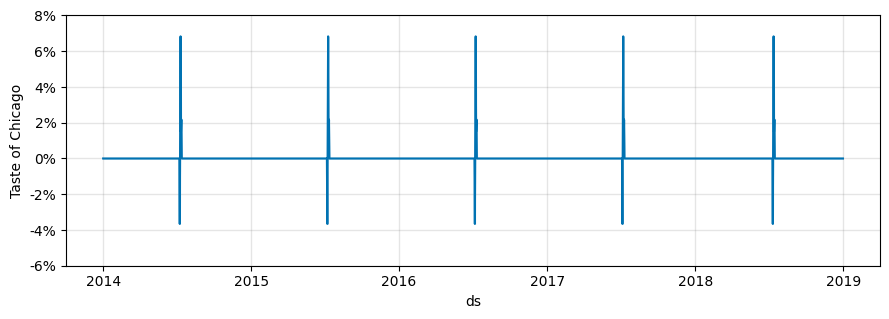

In [53]:
# Para isso nós utilizamos a função plot forecast componente. Importamos do prophet.

from prophet.plot import plot_forecast_component

fig3 = plot_forecast_component(
    model, forecast, "Taste of Chicago", figsize=(10.5, 3.25)
)
plt.show()

# onde nós executamos o predict, qual o nome do feriado que nós queremos visualizar, além do tamanho da figura. 

A magnitude vai de menos 3% até 6,8%

Aprendemos várias formas de interagir com os feriados no Prophet. 

# Como regularizar os feriados 


## Nas aulas anteriores nós entendemos o que era a regularização e como aplicá-las em sazonalidade através do parâmetro seasonality prior scale

A regularização também é importante no contexto de feriados, pois pode ser muito útil para ajustarmos a sensibilidade que o modelo está tendo frente à variação causada por um feriado. 

Assim como para a sazonalidade, nós podemos determinar a regularização de forma global ou local. Vamos usar os dados da divvy bikes e visualizar como o modelo está se comportando com o prior_scale de 10 para os feriados

# **Regularizando Feriados**

In [54]:


model = Prophet(seasonality_mode='multiplicative',
                yearly_seasonality=4,
                holidays_prior_scale=10)

In [55]:

model.add_country_holidays(country_name='US')
model.fit(df)
future = model.make_future_dataframe(periods=365)
forecast = model.predict(future)
forecast.head(4)

21:12:42 - cmdstanpy - INFO - Chain [1] start processing
21:12:42 - cmdstanpy - INFO - Chain [1] done processing


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,Christmas Day,Christmas Day_lower,Christmas Day_upper,Christmas Day (observed),...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,additive_terms,additive_terms_lower,additive_terms_upper,yhat
0,2014-01-01,3522.471225,-718.695951,3224.243772,3522.471225,3522.471225,0.0,0.0,0.0,0.0,...,0.121840,0.121840,0.121840,-0.636201,-0.636201,-0.636201,0.0,0.0,0.0,1176.470439
1,2014-01-02,3527.809132,-143.045419,3497.545795,3527.809132,3527.809132,0.0,0.0,0.0,0.0,...,0.132368,0.132368,0.132368,-0.637714,-0.637714,-0.637714,0.0,0.0,0.0,1745.044924
2,2014-01-03,3533.147038,-268.367541,3457.182277,3533.147038,3533.147038,0.0,0.0,0.0,0.0,...,0.073357,0.073357,0.073357,-0.638889,-0.638889,-0.638889,0.0,0.0,0.0,1535.037628
3,2014-01-04,3538.484945,-1740.009375,1990.637656,3538.484945,3538.484945,0.0,0.0,0.0,0.0,...,-0.289072,-0.289072,-0.289072,-0.639734,-0.639734,-0.639734,0.0,0.0,0.0,251.919021


/home/fabiene/anaconda3/envs/Udemy/lib/python3.11/site-packages/prophet/plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()


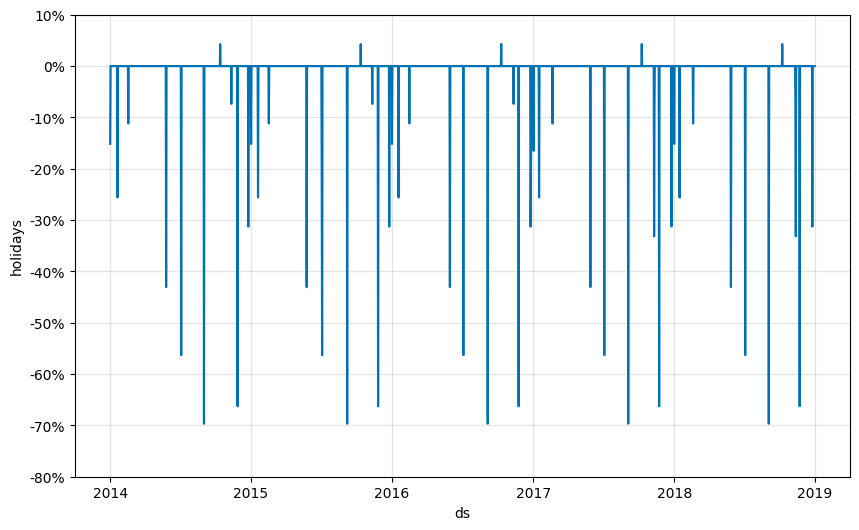

In [56]:
fig = plot_forecast_component(model, forecast, 'holidays')
plt.show()


Verificamos que há feriados que chegam a impactar negativamente a atividade das bikes em menos de -70% quando ocorre. Agora vamos supor que nós desejamos reduzir o impacto que os feriados estão tendo no modelo e para isso. 

Para isso vamos definir o Prior Scale menor, no caso de 0,05. 

In [57]:

model = Prophet(seasonality_mode='multiplicative',
                yearly_seasonality=4,
                holidays_prior_scale=0.05)

21:12:42 - cmdstanpy - INFO - Chain [1] start processing
21:12:42 - cmdstanpy - INFO - Chain [1] done processing
/home/fabiene/anaconda3/envs/Udemy/lib/python3.11/site-packages/prophet/plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()


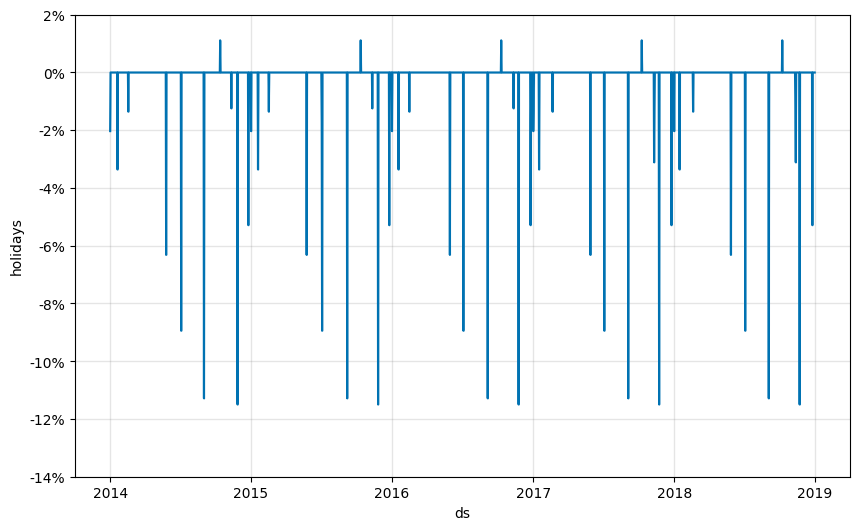

In [58]:
model.add_country_holidays(country_name='US')
model.fit(df)
future = model.make_future_dataframe(periods=365)
forecast = model.predict(future)
#forecast.head(4)
fig = plot_forecast_component(model, forecast, 'holidays')
plt.show()



Executando o código novamente, verificamos que a variação que o feriado causa na previsão foi drasticamente reduzida. O que antes chegava a 70%, agora não passa de 15%. 

Essa é a forma que temos de aplicar a regularização para todos os feriados. Mas, pode ter alguma situação que queremos ajustar o impacto para apenas um feriado específico. 

# Vamos pegar o feriado da Back Friday aqui nesse código.

In [59]:

black_friday = pd.DataFrame({'holiday': 'Black Friday',
                             'ds': pd.to_datetime(
                                 ['2014-11-28',
                                  '2015-11-27',
                                  '2016-11-25',
                                  '2017-11-24',
                                  '2018-11-23']),
                             'prior_scale': 1})


In [60]:
black_friday

,holiday,ds,prior_scale
0,Black Friday,2014-11-28,1
1,Black Friday,2015-11-27,1
2,Black Friday,2016-11-25,1
3,Black Friday,2017-11-24,1
4,Black Friday,2018-11-23,1


# Agora pegamos o dataframe para executar no nosso modelo

In [61]:
holidays = make_holidays_df(year_list=year_list, country='US')
holidays

,ds,holiday
0,2016-01-01,New Year's Day
1,2016-05-30,Memorial Day
2,2016-07-04,Independence Day
3,2016-09-05,Labor Day
4,2016-11-11,Veterans Day
5,2016-11-24,Thanksgiving
6,2016-12-25,Christmas Day
7,2016-12-26,Christmas Day (observed)
8,2016-01-18,Martin Luther King Jr. Day
9,2016-02-15,Washington's Birthday


In [62]:
holidays = pd.concat([holidays,black_friday]).sort_values('ds').reset_index(drop=True)
holidays

,ds,holiday,prior_scale
0,2014-01-01,New Year's Day,NaN
1,2014-01-20,Martin Luther King Jr. Day,NaN
2,2014-02-17,Washington's Birthday,NaN
3,2014-05-26,Memorial Day,NaN
4,2014-07-04,Independence Day,NaN
5,2014-09-01,Labor Day,NaN
6,2014-10-13,Columbus Day,NaN
7,2014-11-11,Veterans Day,NaN
8,2014-11-27,Thanksgiving,NaN
9,2014-11-28,Black Friday,1.0


In [63]:
model = Prophet(seasonality_mode='multiplicative',
                yearly_seasonality=4,
                holidays= holidays,
                holidays_prior_scale=10) #voltando para 10 

21:12:43 - cmdstanpy - INFO - Chain [1] start processing
21:12:43 - cmdstanpy - INFO - Chain [1] done processing
/home/fabiene/anaconda3/envs/Udemy/lib/python3.11/site-packages/prophet/plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()


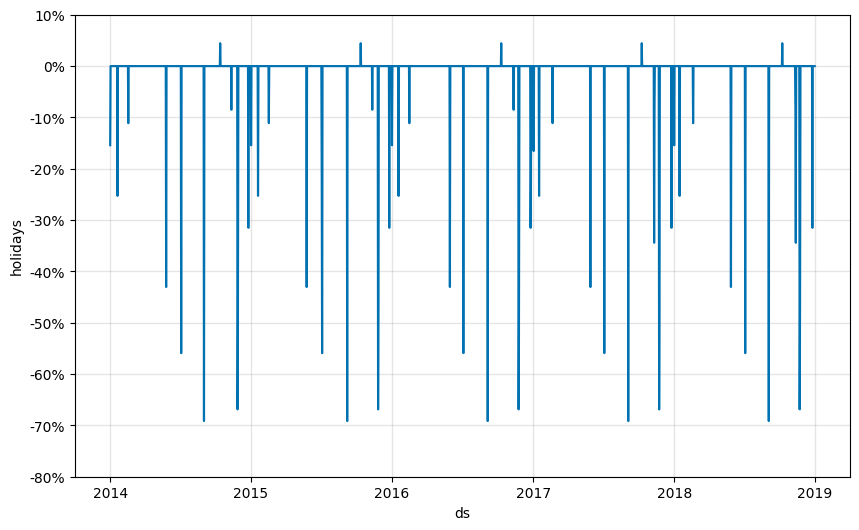

In [64]:
model.add_country_holidays(country_name='US')
model.fit(df)
future = model.make_future_dataframe(periods=365)
forecast = model.predict(future)
#forecast.head(4)
fig = plot_forecast_component(model, forecast, 'holidays')
plt.show()


O nosso feriado de Black Friady assumiu a prior_scale de 1. E os outros feriados que não tiveram um prior_scale definido, eles assumiram o prior scale de 10 definido na instanciação do modelo. E dessa forma que nós aplicamos a regularização de forma local somente em um feriado.